In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [23]:
df = pd.read_csv('Beer Sales.csv')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(), "\n")
print(df.info())

        Date    Sales
0 2010-06-01   9150.0
1 2010-06-20  10084.0
2 2010-07-12   9242.0
3 2010-07-28  10361.0
4 2010-08-03   8829.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    35 non-null     datetime64[ns]
 1   Sales   35 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 688.0 bytes
None


In [26]:
df = df.set_index('Date')
print(df)
print(df.info())

              Sales
Date               
2010-06-01   9150.0
2010-06-20  10084.0
2010-07-12   9242.0
2010-07-28  10361.0
2010-08-03   8829.0
2010-08-16   9253.0
2010-08-29  10713.0
2010-09-02  10689.0
2010-09-19   8884.0
2010-10-05   9155.0
2011-06-01  10369.0
2011-06-20  10299.5
2011-07-12   9628.0
2011-07-28   8735.0
2011-08-03   9840.0
2011-08-16  10246.0
2011-09-02  10240.0
2011-09-19   9914.0
2011-10-05  10288.0
2012-06-01   9445.0
2012-06-20   9088.0
2012-07-12  10169.0
2012-07-28  10412.0
2012-08-03  10065.0
2012-08-16  10262.0
2012-09-02   9625.0
2012-09-19   9412.0
2012-10-05   9840.0
2013-06-01   9293.0
2013-06-20  10124.0
2013-07-12  10215.0
2013-08-03  10312.0
2013-08-16   9719.0
2013-09-02   9370.0
2013-10-05   9976.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2010-06-01 to 2013-10-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   35 non-null     float64
dtypes: float64(1)
memory u

In [27]:
df['Day'] = df.index.dayofyear
df['Year'] = df.index.year
df

,Sales,Day,Year
Date,,,
2010-06-01,9150.0,152,2010
2010-06-20,10084.0,171,2010
2010-07-12,9242.0,193,2010
2010-07-28,10361.0,209,2010
2010-08-03,8829.0,215,2010
2010-08-16,9253.0,228,2010
2010-08-29,10713.0,241,2010
2010-09-02,10689.0,245,2010
2010-09-19,8884.0,262,2010


In [28]:
piv = pd.pivot_table(df, index=['Day'], columns=['Year'], values=['Sales'])
piv

Sales                           
Year     2010     2011     2012     2013
Day                                     
152    9150.0  10369.0      NaN   9293.0
153       NaN      NaN   9445.0      NaN
171   10084.0  10299.5      NaN  10124.0
172       NaN      NaN   9088.0      NaN
193    9242.0   9628.0      NaN  10215.0
194       NaN      NaN  10169.0      NaN
209   10361.0   8735.0      NaN      NaN
210       NaN      NaN  10412.0      NaN
215    8829.0   9840.0      NaN  10312.0
216       NaN      NaN  10065.0      NaN
228    9253.0  10246.0      NaN   9719.0
229       NaN      NaN  10262.0      NaN
241   10713.0      NaN      NaN      NaN
245   10689.0  10240.0      NaN   9370.0
246       NaN      NaN   9625.0      NaN
262    8884.0   9914.0      NaN      NaN
263       NaN      NaN   9412.0      NaN
278    9155.0  10288.0      NaN   9976.0
279       NaN      NaN   9840.0      NaN

In [30]:
def my_func(row):
    if row['Year']==2012:
        return row['Day'] - 1
    else:
        return row['Day']

df['NewDay'] = df.apply(lambda row: my_func(row), axis=1)
df

,Sales,Day,Year,NewDay
Date,,,,
2010-06-01,9150.0,152,2010,152.0
2010-06-20,10084.0,171,2010,171.0
2010-07-12,9242.0,193,2010,193.0
2010-07-28,10361.0,209,2010,209.0
2010-08-03,8829.0,215,2010,215.0
2010-08-16,9253.0,228,2010,228.0
2010-08-29,10713.0,241,2010,241.0
2010-09-02,10689.0,245,2010,245.0
2010-09-19,8884.0,262,2010,262.0


In [31]:
df.drop(columns = 'Day', axis = 1)

,Sales,Year,NewDay
Date,,,
2010-06-01,9150.0,2010,152.0
2010-06-20,10084.0,2010,171.0
2010-07-12,9242.0,2010,193.0
2010-07-28,10361.0,2010,209.0
2010-08-03,8829.0,2010,215.0
2010-08-16,9253.0,2010,228.0
2010-08-29,10713.0,2010,241.0
2010-09-02,10689.0,2010,245.0
2010-09-19,8884.0,2010,262.0


In [32]:
piv = pd.pivot_table(df, index=['NewDay'], columns=['Year'], values=['Sales'])
piv

Sales                           
Year       2010     2011     2012     2013
NewDay                                    
152.0    9150.0  10369.0   9445.0   9293.0
171.0   10084.0  10299.5   9088.0  10124.0
193.0    9242.0   9628.0  10169.0  10215.0
209.0   10361.0   8735.0  10412.0      NaN
215.0    8829.0   9840.0  10065.0  10312.0
228.0    9253.0  10246.0  10262.0   9719.0
241.0   10713.0      NaN      NaN      NaN
245.0   10689.0  10240.0   9625.0   9370.0
262.0    8884.0   9914.0   9412.0      NaN
278.0    9155.0  10288.0   9840.0   9976.0

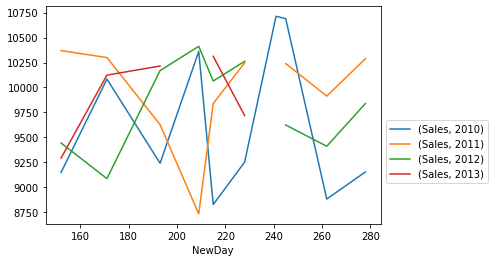

In [33]:
piv.plot()
plt.legend(bbox_to_anchor=(1.0, 0.5))